In [25]:
import statistics

In [26]:
import pandas as pd

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from helpers import *
from regression import *

In [29]:
ELO_DATE = '2025-11-10'
NUMBER_OF_SIMS = 10000
LEAGUE_ID = 107
SEASON = 2025
HEAD_SIZE = 24
COUNTRY_CODE_ELO = None
COUNTRY_CODE_API = 'POL'
STDEV = 10
UPDATE_FIXTURES = False

In [30]:
# download_elo_data(ELO_DATE)

In [31]:
# api_get_leagues()

In [32]:
# find_league_id('GB-ENG', 'Premier League')

# Brazil
# Brazil Serie A: 71

# England
# Premier League: 39
# Championship: 40
# League One: 41
# League Two: 42

# France
# Ligue 1: 61

# Germany
# Bundesliga: 78

# Italy
# Serie A: 135

# Poland
# Ekstraklasa: 106
# I Liga [Poland]: 107
# Polish Cup: 108
# II Liga - East [?] [Poland]: 109

# Romania
# Liga I: 283

# Scotland
# Premiership: 179

# Spain
# La Liga: 140

In [33]:
# df = get_api_teams_and_elo_from_clubelo(ELO_DATE, 'ENG')
# df.head(20)

In [34]:
# elo_drift_df = pd.merge(df, df2, how='inner', on='Club', suffixes=('_before', '_after'))
# elo_drift_df['Elo_Drift'] = elo_drift_df['Elo_after'] - elo_drift_df['Elo_before']
# season_stdev = statistics.stdev(elo_drift_df['Elo_Drift'])
# print(season_stdev)
# elo_drift_df.head(20)

451 ELO teams matched.
19 unmatched ELO teams found, see transformed/elo/elo_unmatched.csv:
464 Opta teams matched.
562 unmatched Opta teams found, see transformed/opta/opta_unmatched_map.csv:
771 unmatched Opta teams found, see transformed/opta/opta_unmatched_elo_df.csv:
433 teams used for regression.
0.9272 R^2 score
y = 23.97 * x + -346.64


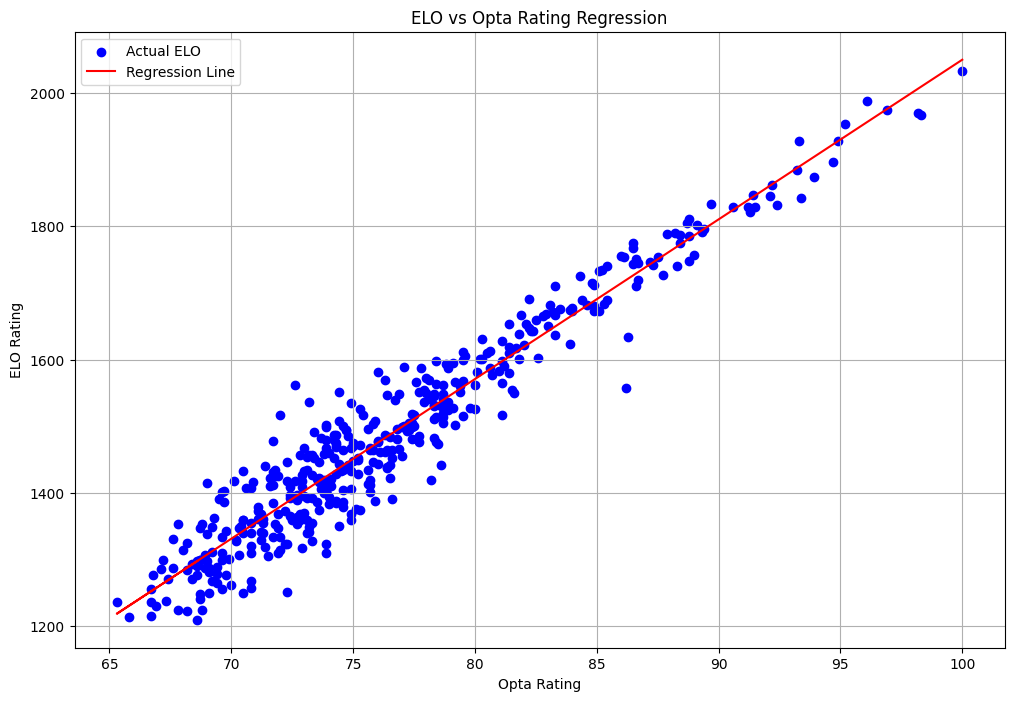

In [35]:
main_regression()

In [36]:
standings_df = build_historical_standings_table_after_at_most_n_rounds(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, update_fixtures=UPDATE_FIXTURES)
standings_df.head(HEAD_SIZE)

,Club,Elo,Points,Games played
1,Wisla Krakow,1369.42,38,16
2,Pogoń Grod. Mazowiecki,1165.70,31,16
3,Chrobry Głogów,1163.30,28,16
4,Polonia Bytom,1172.89,27,16
5,Slask Wroclaw,1254.38,27,16
6,Stal Rzeszów,1120.16,24,16
7,Ruch Chorzów,1182.48,24,16
8,Polonia Warszawa,1201.65,23,16
9,Wieczysta Kraków,1163.30,23,16
10,Odra Opole,1122.56,22,16


In [37]:
standings_df['Points'] = standings_df.apply(lambda x: x['Points']-5 if x['Club'] == 'Lechia Gdansk' else x['Points'], axis=1)
standings_df.head(HEAD_SIZE)

,Club,Elo,Points,Games played
1,Wisla Krakow,1369.42,38,16
2,Pogoń Grod. Mazowiecki,1165.70,31,16
3,Chrobry Głogów,1163.30,28,16
4,Polonia Bytom,1172.89,27,16
5,Slask Wroclaw,1254.38,27,16
6,Stal Rzeszów,1120.16,24,16
7,Ruch Chorzów,1182.48,24,16
8,Polonia Warszawa,1201.65,23,16
9,Wieczysta Kraków,1163.30,23,16
10,Odra Opole,1122.56,22,16


In [38]:
float(round(standings_df['Points'].sum() / standings_df['Games played'].sum(), 2))

1.36

In [39]:
sample_season = simulate_season_after_n_rounds(league_id=LEAGUE_ID, season=SEASON, standings_df=standings_df)
sample_season.head(HEAD_SIZE)

,Club,Points,Elo,Games played
0,Wisla Krakow,68,1369.42,34
4,Slask Wroclaw,60,1254.38,34
1,Pogoń Grod. Mazowiecki,56,1165.70,34
3,Polonia Bytom,55,1172.89,34
10,ŁKS Łódź,54,1199.25,34
7,Polonia Warszawa,50,1201.65,34
12,Pogoń Siedlce,50,1158.51,34
13,Puszcza Niepołomice,49,1192.06,34
2,Chrobry Głogów,49,1163.30,34
11,Miedz Legnica,48,1201.65,34


In [40]:
float(round(sample_season['Points'].sum() / sample_season['Games played'].sum(), 2))

1.37

In [41]:
# top 1
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=1, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [02:22<00:00, 70.26it/s]

10000 simulations
1 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Wisla Krakow,9796,9763.0,98.0,97.6,1.02,1.02
2,Slask Wroclaw,94,80.0,0.9,0.8,106.38,125.00
3,Pogoń Grod. Mazowiecki,62,53.0,0.6,0.5,161.29,188.68
4,Chrobry Głogów,15,14.0,0.2,0.1,666.67,714.29
5,Polonia Warszawa,12,9.0,0.1,0.1,833.33,1111.11
6,Polonia Bytom,11,8.0,0.1,0.1,909.09,1250.00
7,Stal Rzeszów,3,2.0,0.0,0.0,3333.33,5000.00
8,Miedz Legnica,2,2.0,0.0,0.0,5000.00,5000.00
9,Ruch Chorzów,2,1.0,0.0,0.0,5000.00,10000.00
10,Puszcza Niepołomice,1,0.0,0.0,0.0,10000.00,inf


In [42]:
# top 2
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=2, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [02:38<00:00, 62.99it/s]

10000 simulations
2 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Wisla Krakow,9973,9965.0,99.7,99.6,1.00,1.00
2,Slask Wroclaw,3263,3016.0,32.6,30.2,3.06,3.32
3,Pogoń Grod. Mazowiecki,2434,2230.0,24.3,22.3,4.11,4.48
4,Polonia Bytom,1158,1028.0,11.6,10.3,8.64,9.73
5,Chrobry Głogów,1038,910.0,10.4,9.1,9.63,10.99
6,Polonia Warszawa,570,484.0,5.7,4.8,17.54,20.66
7,Ruch Chorzów,474,396.0,4.7,4.0,21.10,25.25
8,Miedz Legnica,331,282.0,3.3,2.8,30.21,35.46
9,Wieczysta Kraków,245,206.0,2.4,2.1,40.82,48.54
10,ŁKS Łódź,234,193.0,2.3,1.9,42.74,51.81


In [43]:
# top 3
# results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=3, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
# results.head(HEAD_SIZE)

In [44]:
# top 6
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=6, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [02:44<00:00, 60.84it/s]

10000 simulations
6 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Wisla Krakow,10000,10000,100.0,100.0,1.00,1.00
2,Slask Wroclaw,8373,8187,83.7,81.9,1.19,1.22
3,Pogoń Grod. Mazowiecki,7809,7552,78.1,75.5,1.28,1.32
4,Polonia Bytom,5952,5660,59.5,56.6,1.68,1.77
5,Chrobry Głogów,5791,5462,57.9,54.6,1.73,1.83
6,Polonia Warszawa,4424,4109,44.2,41.1,2.26,2.43
7,Ruch Chorzów,3968,3659,39.7,36.6,2.52,2.73
8,Miedz Legnica,3217,2905,32.2,29.0,3.11,3.44
9,ŁKS Łódź,2704,2444,27.0,24.4,3.70,4.09
10,Wieczysta Kraków,2565,2272,25.6,22.7,3.90,4.40


In [45]:
# bottom 3
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=3, reverse=True, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [02:40<00:00, 62.47it/s]

10000 simulations
3 winning places
Reverse: TRUE


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Znicz Pruszków,8092,7852,80.9,78.5,1.24,1.27
2,Górnik Łęczna,7605,7379,76.0,73.8,1.31,1.36
3,Tychy 71,5946,5626,59.5,56.3,1.68,1.78
4,Stal Mielec,5324,5012,53.2,50.1,1.88,2.00
5,Odra Opole,788,656,7.9,6.6,12.69,15.24
6,Puszcza Niepołomice,699,584,7.0,5.8,14.31,17.12
7,Pogoń Siedlce,503,418,5.0,4.2,19.88,23.92
8,Stal Rzeszów,337,287,3.4,2.9,29.67,34.84
9,ŁKS Łódź,208,177,2.1,1.8,48.08,56.50
10,Wieczysta Kraków,179,140,1.8,1.4,55.87,71.43
